In [14]:
# 建立一个sequential 顺序模型
from keras.models import Sequential
model = Sequential()

In [23]:
# 通过add 增加各层网络
from keras.layers import Dense,Input
#model.add(Input(shape=(2,)))
model.add(Dense(units=3, activation='sigmoid', input_dim=3))
model.add(Dense(units=1, activation = 'sigmoid'))
model.summary

<bound method Model.summary of <Sequential name=sequential_2, built=True>>

In [24]:
# 通过compile配置模型求解过程参数
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [25]:
# laod the data
import pandas as pd
import numpy as np
data = pd.read_csv('./data/MLP/data_MLP.csv')

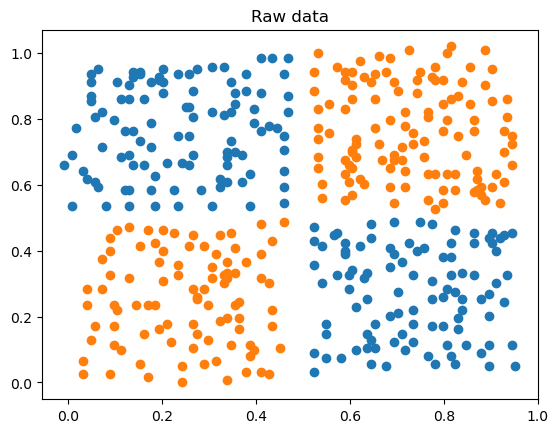

In [26]:
# visulize the data
x = data.drop(['y'],axis=1)
x1 =  x.loc[:,'x1']
x2 = x.loc[:,'x2']
y = data.loc[:,'y']
from matplotlib import pyplot as plt
fig1 = plt.figure()
cata1 = plt.scatter(x1[y==0],x2[y==0])
cata2 = plt.scatter(x1[y==1],x2[y==1])
plt.title('Raw data')
plt.show()

In [27]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
print(type(x_test),type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [28]:
# set the model
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
#train the model
model.fit(x_train,y_train, epochs=5000)

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.7664
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.7489
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.7324
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.7209
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.7127
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.7068
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.7021
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.6996
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.6979
Epoch 10/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6968
Epoch 11/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.6961
Epoch 12/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.6963
Epoch 13/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.6956
Epoch 14/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.6955
Epoch 15/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.6955
Epoch 

In [31]:
# make prediction and calcuate the accuracy
y_train_predict = (model.predict(x_train)>0.5).astype('int32')
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
y_test_predict =(model.predict(x_test)>0.5).astype('int32')
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_train,accuracy_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.6327272727272727 0.5588235294117647


In [32]:
# visulize the data 
print(type(y_train_predict))
y_train_predict_form = pd.Series(i[0] for i in y_train_predict)
print(y_train_predict_form)

<class 'numpy.ndarray'>
0      1
1      0
2      0
3      0
4      1
      ..
270    0
271    0
272    0
273    1
274    0
Length: 275, dtype: int32


In [33]:
# visulize the data
xx, yy = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
x_range = np.c_[xx.ravel(),yy.ravel()]
y_range_predict = (model.predict(x_range)>0.5).astype('int32')
y_range_predict_form = pd.Series(i[0] for i in y_range_predict)
print(x_range)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step
[[0.   0.  ]
 [0.01 0.  ]
 [0.02 0.  ]
 ...
 [0.97 0.99]
 [0.98 0.99]
 [0.99 0.99]]


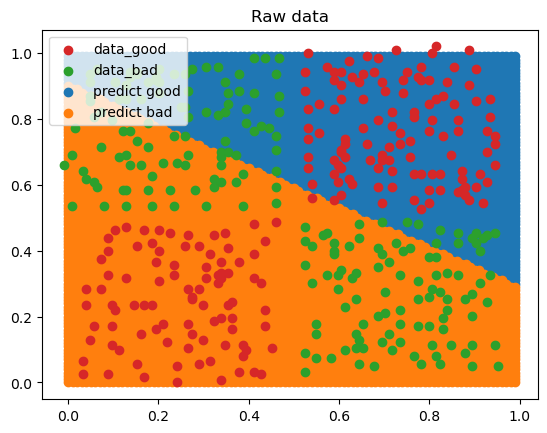

In [34]:
# visualize the data
fig2 = plt.figure()
predict_good = plt.scatter(x_range[:,0][y_range_predict_form==1], x_range[:,1][y_range_predict_form==1])
predict_bad = plt.scatter(x_range[:,0][y_range_predict_form==0], x_range[:,1][y_range_predict_form==0])
data_bad = plt.scatter(x1[y==0],x2[y==0])
data_good = plt.scatter(x1[y==1],x2[y==1])
plt.title('Raw data')
plt.legend((data_good,data_bad,predict_good,predict_bad),('data_good','data_bad','predict good','predict bad'))
plt.show()